## **Probabilidad condicional**

Una de las nociones más fundamentales en probabilidad condicional es la del **teorema de Bayes** el cual habla de una probabilidad conjunta de sucesos que en principio son dependientes uno del otro. 

De manera general si $B_{1}, B_{2}, ..., B_{k}$ representa una partición de $C$ y $A$ es un evento arbitrario de $C$, la probabilidad total de $A$ está dada por

\begin{equation}
P(A) = P(B_{1})\cdot P(A\mid B_{1})+P(B_{2})\cdot P(A\mid B_{2})+...+P(B_{k})\cdot P(A\mid B_{k}) = \sum_{i = 1}^{k}P(B_{i})\cdot P(A\mid B_{i})
\end{equation}

Siguiendo este razonamiento al ser $A$, un evento más general del conjunto $C$, es de gran interés poder calcular la probabilidad de los eventos dependientes bajo el supuesto de que sabemos que a ocurrido $A$, entonces para $r = 1, 2, ..., k,$

\begin{equation}
P\left ( B_{r}\mid  A\right ) = \frac{P(B_{r})\cdot P(A\mid B_{r})}{\sum_{i = 1}^{k}P(B_{i})\cdot P(A\mid B_{i})}
\end{equation}

Donde $P\left ( B_{r}\mid  A\right )$ representa la probabilidad de que suceda el evento $B_{r}$, dado que se sabe que a sucedido $A$. Dicha expresión anterior puede ser escrita de manera más compacta como le sigue:

\begin{equation}
P\left ( B_{r}\mid  A\right ) = \frac{P(B_{r}\cap A)}{P(A)}
\end{equation}

para $P(B_{r}\cap A)$ la intersección del evento $B_{r}$ en el evento $A$.


podemos expresar entonces el **teorema de Bayes** como se muestra a continuación:

\begin{equation}
P(\lambda (x_{i}, \vec{\theta}) \mid \vec{x}) = \frac{P(\lambda(x_{i}, \vec{\theta}))\cdot P(\vec{x}\mid \lambda(x_{i}, \vec{\theta}))}{P(\vec{x})} 
\end{equation}

donde $\vec{x}$ son los datos con los que entrenaremos el modelo $\lambda (x_{i},\vec{\theta })$ con parámetros $\vec{\theta }$ identificando los siguientes términos:

*   $P(\vec{x}\mid \lambda(x_{i}, \vec{\theta}))$ es el likelihood 
*   $P(\lambda(x_{i}, \vec{\theta}))$ se conoce como el prior
*   donde $P( \lambda (x_{i},\vec{\theta })\mid \vec{x})$ es el posterior.

El prior es una distribución propuesta, con parámetros bien o no tan bien conocidos de un experimento anterior.





In [1]:
import sys

sys.path.insert(0, "..")

import numpy as np
import pandas as pd
from likelihood.main import walkers, walk
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", "RuntimeWarning")

plt.rcParams["font.size"] = 24
plt.style.use("seaborn-poster")

Definimos a su vez el likelihood 

\begin{equation}
\mathcal{L} \propto \prod_{i}^{n}\frac{1}{\sqrt{2\pi}\sigma _{i}}\exp\left ( -\frac{\left ( x_{i}-\mu  \right )^{2}}{2\sigma _{i}^{2}} \right )
\end{equation}

Aplicando el logaritmo ambos lados

\begin{equation}
-\log(\mathcal{L}(\vec{x},\vec{y}\mid \vec{\theta }))\propto \frac{1}{2}\sum_{i}^{n}\left ( \frac{y_{i}-\lambda (x_{i},\vec{\theta })}{\sigma_{i}} \right )^{2}
\end{equation}

### **Ejemplo 1**

* Se tienen los siguientes datos (gráfica 1), y nuestro objetivo es encontrar un modelo paramétrico que los ajuste
* Proponemos el siguiente modelo : $f(x_{1},x_{2} ; \theta_{1}, \theta_{2}) = \theta_{1} x_{1} + \theta_{2} x_{2}^2$

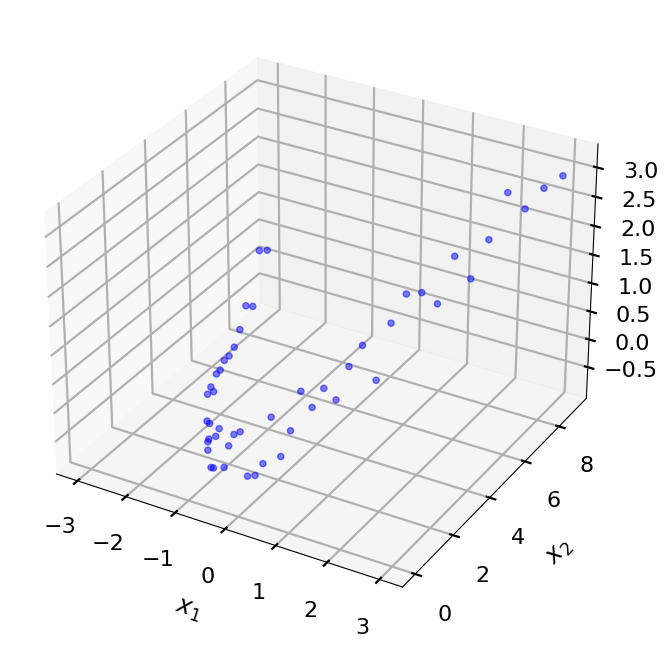

In [2]:
np.random.seed(1)


# Definimos el modelo: f(x1, x2) = theta_1*x1 + theta_2*x2
def model(x, theta):
    return x[0] * theta[0] + x[1] * theta[1]


# Definimos las variables independientes, [x, x**2]
x = np.expand_dims(np.linspace(-3, 3, 50), axis=1)
# Dimension (50, 1)

# Definimos la variable independiente
y = 0.5 * x + 0.2 * x**2 + 0.5 * (2 * np.random.rand(len(x), 1) - 1)
# Dimension (50, 1)

x_vec = np.array([x, x**2])
# Dimension (2, 50, 1)

# Inicializamos los parametros
theta = np.array([0.0, 0.0])  # Dimension (2)

# Mostramos los datos
fig = plt.figure(figsize=plt.figaspect(0.5))  # Creamos la figura
ax = fig.add_subplot(111, projection="3d")  # Creamos la figura para 3d
ax.scatter(
    x, x**2, y, color="blue", alpha=0.5, linewidths=1, label="Original Data"
)  # Ploteamos los puntos
ax.set_xlabel("$x_1$", labelpad=20)
ax.set_ylabel("$x_2$", labelpad=20)
ax.set_zlabel("$f(x_1, x_2)$", labelpad=20)
# ax.set_title("Gráfica 1")
# ax.legend()
plt.savefig("D:/Documentos/GitHub/likelihood/examples/plot-data.png", dpi=300, transparent=True)
plt.show()

**Entrenamos el modelo con solo un caminador: $\text{walk}$**

1.   $x_{\text{vec}}$ : matriz de datos de la variable independiente.
2.   $y$ : vector de datos de la variable dependiente
3.   $\text{model}$ : funcion donde se construye el modelo
4.   $\text{theta}$ : lista de los parámetros a encontrar
5.   $\text{mode = True}$ : variable booleana que indica que solo se utilizará un caminador

  retorna:

*   $\text{theta}$ : lista de los parámetros encontrados
*   $\text{nwalk}$ : el caminador
*   $\text{error}$ : error cometido 






In [3]:
# Entrenamos el modelo
theta, nwalk, error = walk(x_vec, y, model, theta, None, 0.01, 200, 0.1, 1.0 * 10**-3, mode=True)

Maximum number of iterations reached!
The log-likelihood is: 362.95874296348177


In [4]:
print("El valor de theta_1 es: {0}, y el valor de theta_2 es: {1}".format(theta[0], theta[1]))

El valor de theta_1 es: 0.711984234268178, y el valor de theta_2 es: 0.18100528332601293


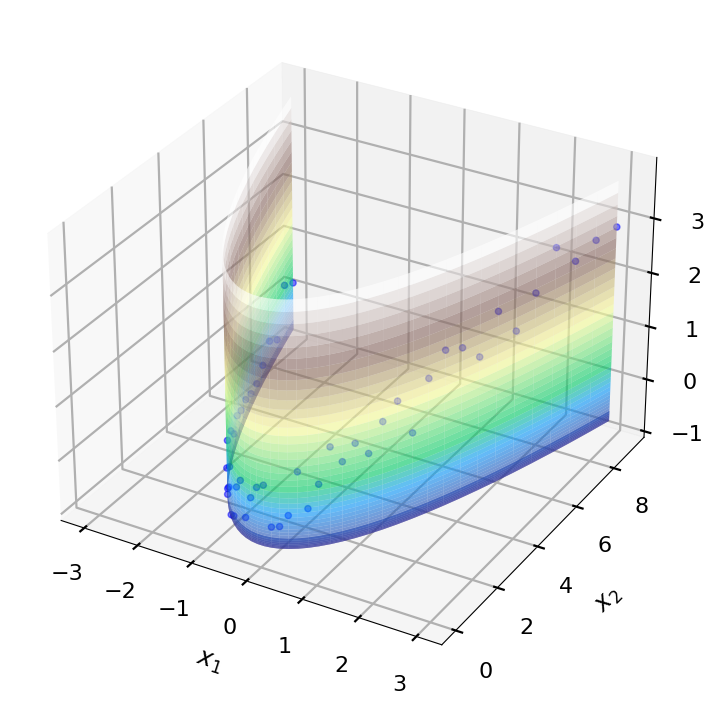

In [5]:
# Gráfico de modelo paramétrico -> f(x_1,x_2) =  0.1033x1+0.1492x2^2
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(
    x,
    x**2,
    model(x_vec, theta).T,
    alpha=0.6,
    cmap="terrain",
    label="$f(x_{1},x_{2}) = 0.1033x_{1} + 0.1492x_{2}^2$",
)
ax.scatter(x, x**2, y, color="blue", alpha=0.5, linewidths=1, label="Original Data")

ax.set_xlabel("$x_1$", labelpad=20)
ax.set_ylabel("$x_2$", labelpad=20)
ax.set_zlabel("$f(x_1, x_2)$", labelpad=20)
# ax.set_title("Gráfica 2")
plt.savefig("D:/Documentos/GitHub/likelihood/examples/plot-data(2).png", dpi=300, transparent=True)
# ax.legend()
plt.show()

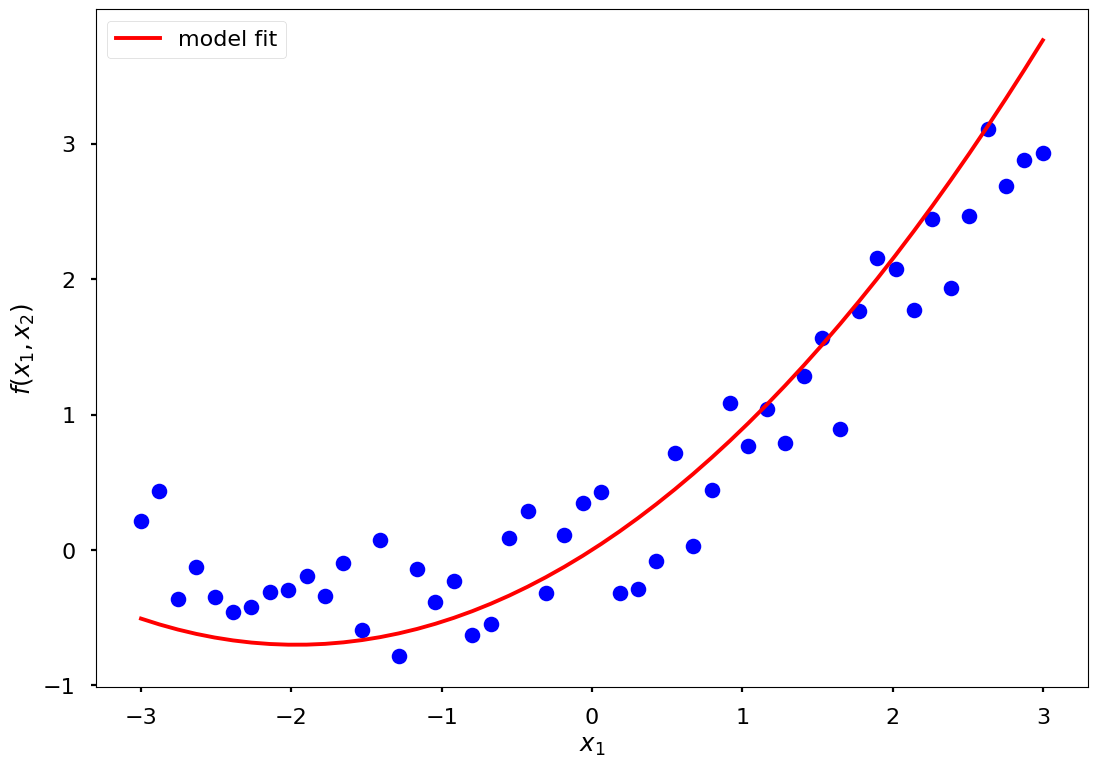

In [6]:
# Gráfica del modelo en la dimensión x1
plt.plot(x, y, "bo")
plt.plot(x, model(x_vec, theta), "r-", label="model fit")
plt.xlabel("$x_{1}$")
plt.ylabel("$f(x_1,x_2)$")
# plt.title("Gráfica 3")
plt.savefig("D:/Documentos/GitHub/likelihood/examples/plot-data(3).png", dpi=300, transparent=True)
plt.legend()
plt.show()

**Entrenamos el modelo con 20 caminadores: $\text{walkers}$**

1.   $\text{nwalkers}$ : número de caminadores.
2.   $x_{\text{vec}}$ : matriz de datos de la variable independiente.
3.   $y$ : vector de datos de la variable dependiente
4.   $\text{model}$ : función donde se construye el modelo
5.   $\text{theta}$ : lista de los parámetros a encontrar
6.   $\text{mode = True}$ : variable booleana que indica que sólo se utilizará un caminador

  retorna:

*   $\text{par}$ : lista de listas que almacena los parámetros encontrados por cada caminador
*   $\text{error}$ : error cometido por los caminadores

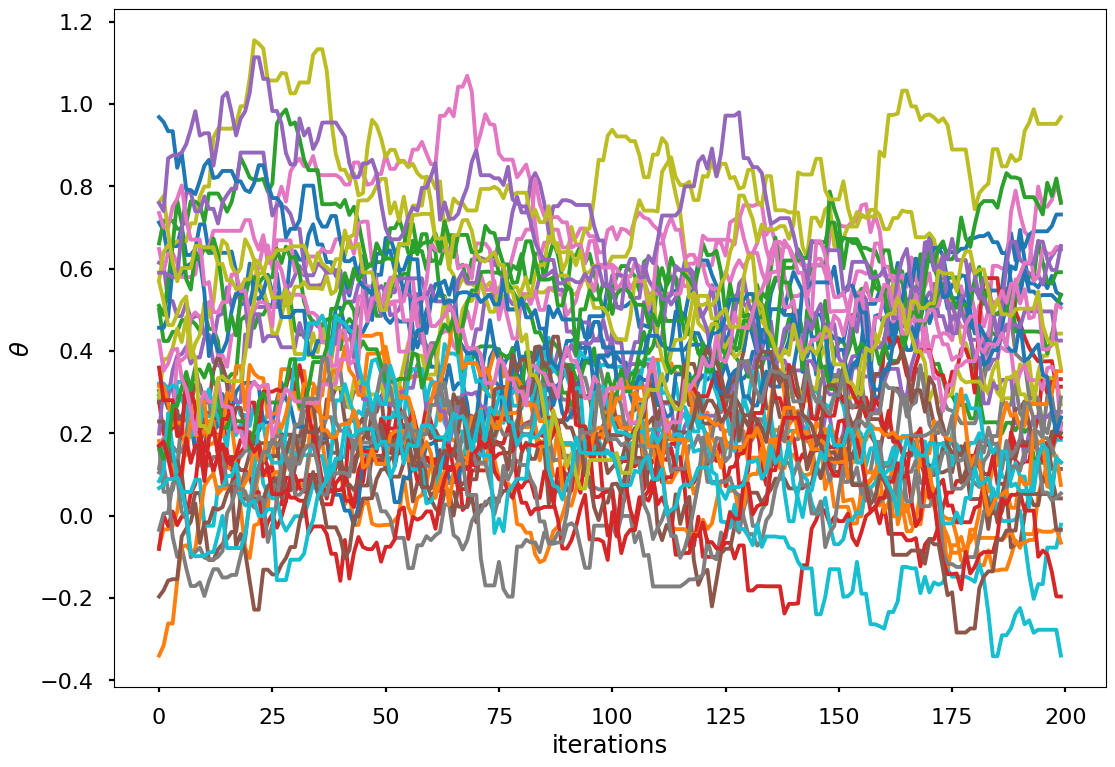

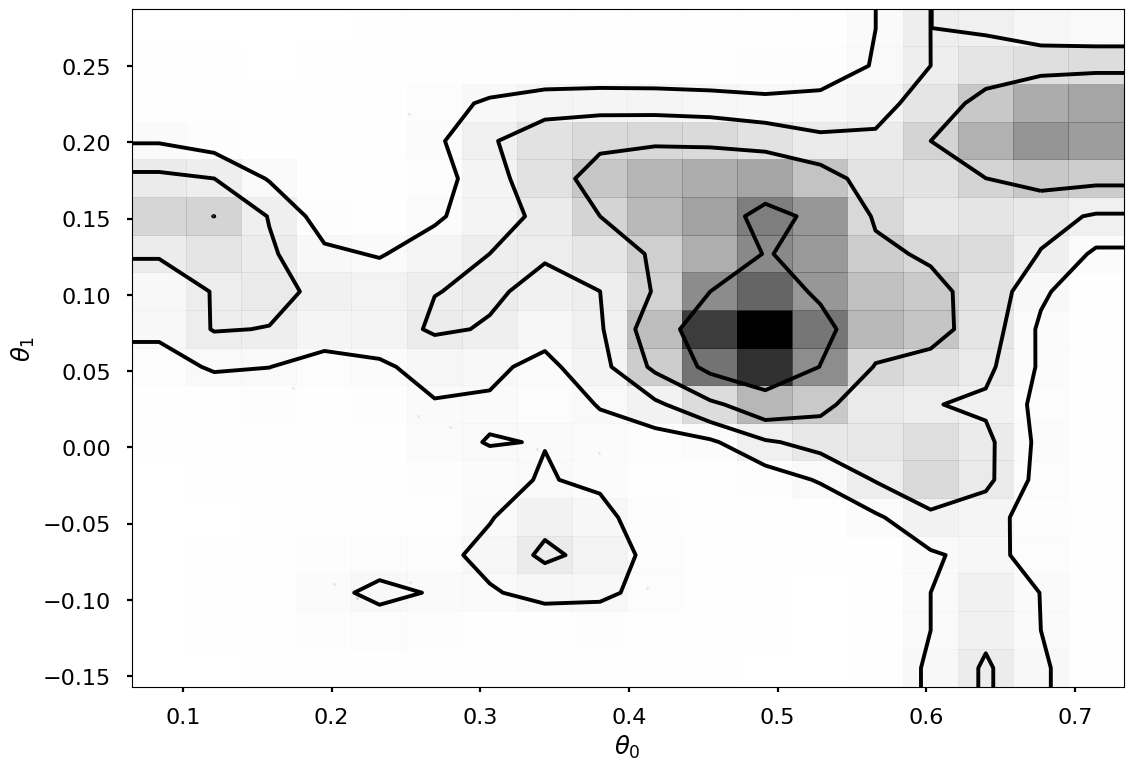

In [7]:
par, error = walkers(20, x_vec, y, model, theta, None, 0.01, 200, 0.1, 1.0 * 10**-3, False)

In [8]:
# Buscamos el mejor caminador, aquel que tenga el menor error
n = np.where(error == min(error))[0][0]

In [9]:
print("El mejor caminador es el número {}".format(n))

El mejor caminador es el número 11


In [10]:
# Obtenemos los parámetros del mejor caminador
par = np.array(par[n])

In [11]:
print("El valor de theta_1 es: {0}, y el valor de theta_2 es: {1}".format(par[0], par[1]))

El valor de theta_1 es: 0.5898489771033717, y el valor de theta_2 es: 0.22845842170486533


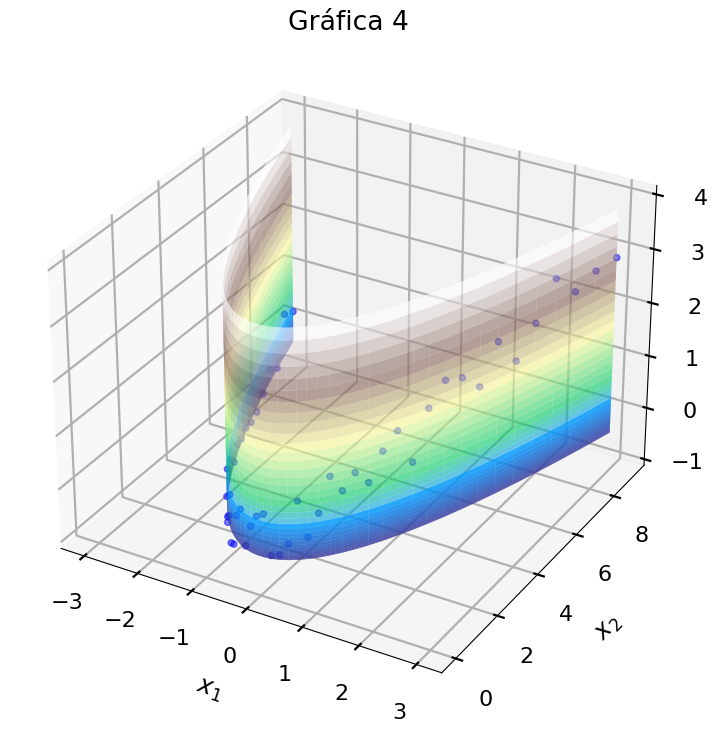

In [12]:
# Grafico de modelo paramétrico -> f(x_1,x_2) = 0.5296x1+0.18954x2^2
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(
    x,
    x**2,
    model(x_vec, par).T,
    alpha=0.6,
    cmap="terrain",
    label="$f(x_{1},x_{2}) = 0.5296x_{1} + 0.18954x_{2}^2$",
)
ax.scatter(x, x**2, y, color="blue", alpha=0.5, linewidths=1, label="Original Data")

ax.set_xlabel("$x_1$", labelpad=20)
ax.set_ylabel("$x_2$", labelpad=20)
ax.set_zlabel("$f(x_1, x_2)$", labelpad=20)
plt.savefig("D:/Documentos/GitHub/likelihood/examples/plot-data(4).png", dpi=300, transparent=True)
ax.set_title("Gráfica 4")
# ax.legend()
plt.show()

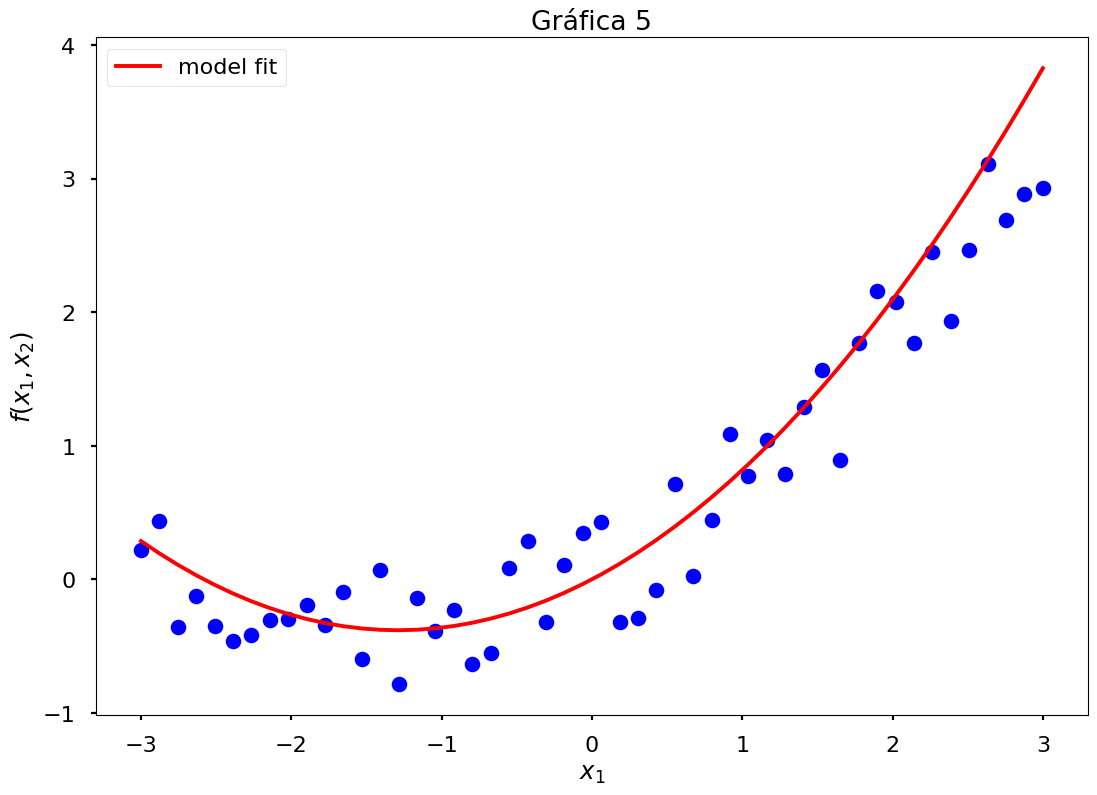

In [13]:
# Grafica de una dimension del modelo de la gráfica 4
plt.plot(x, y, "bo")
plt.plot(x, model(x_vec, par), "r-", label="model fit")
plt.xlabel("$x_1$")
plt.ylabel("$f(x_1,x_2)$")
plt.title("Gráfica 5")
plt.savefig("D:/Documentos/GitHub/likelihood/examples/plot-data(5).png", dpi=300, transparent=True)
plt.legend()
plt.show()

### **Ejemplo 2**

* Tenemos una base de datos del número de multimillonarios por país y por año. 

* Nuetro objetivo es encontrar un modelo y sus parámetros que mejor logre captar la dependencia entre la variable dependiente e independiente

In [14]:
# Importamos la libreria pandas para el manejo de datos
import pandas as pd

In [15]:
# Decargarmos la base de datos
df = pd.read_stata(
    "https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/mle/fp.dta?raw=true"
)
# Descragamos el numero de billionarios de estados unidos en 2008
billionaires = df[(df["year"] == 2008) & (df["country"] != "United States")].loc[:, "numbil0"]

# billions -> Cantidad de billones
# numBbillionaires -> numero de personas con x cantidad de billones
billions, numbillionaires = np.unique(billionaires, return_counts=True)
billions = np.expand_dims(billions, axis=(0, 2))
numbillionaires = np.expand_dims(numbillionaires, axis=1)

In [16]:
# Mostramos la base datos
# df

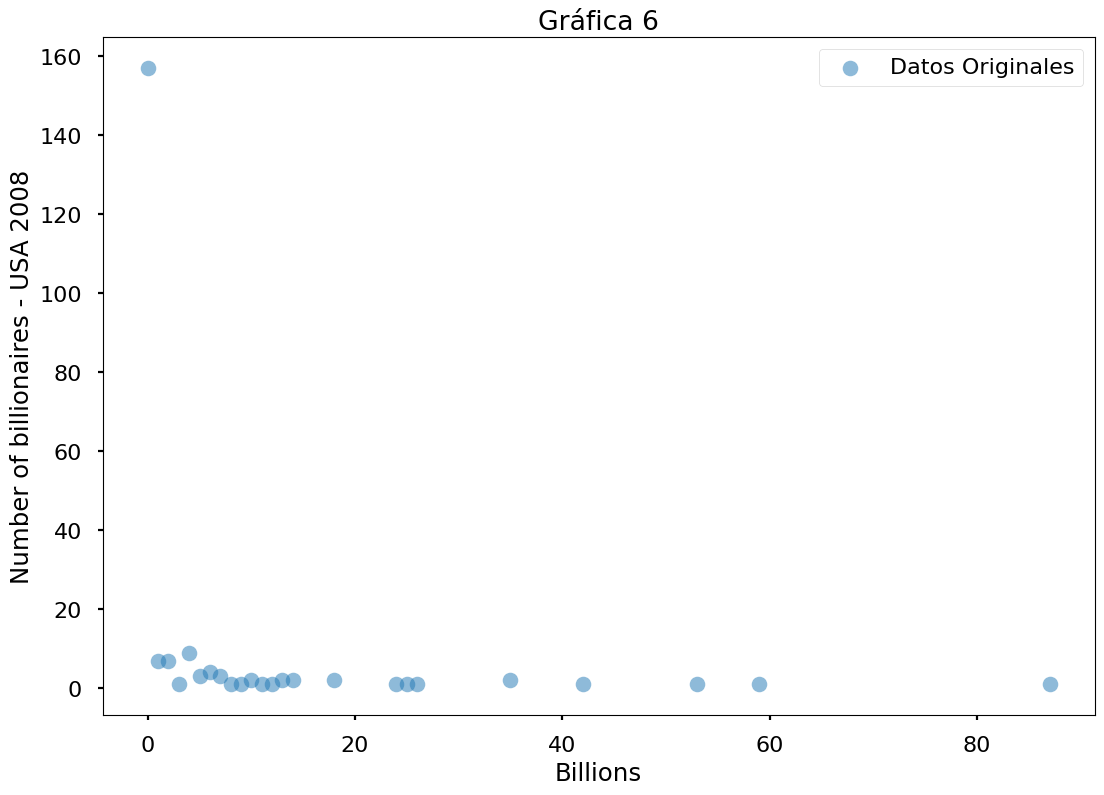

In [17]:
# Mostramos la dispersión de los datos
plt.scatter(billions, numbillionaires, label="Datos Originales", alpha=0.5, linewidths=0.001)
plt.xlabel("Billions")
plt.ylabel("Number of billionaires - USA 2008")
plt.title("Gráfica 6")
plt.legend()
plt.show()

* Análisis de la familia de funciones :  $f(x;\theta_{1},\theta_{2}) = \theta_{1} e^{-\theta_{2} x}$ - Gráfica 7

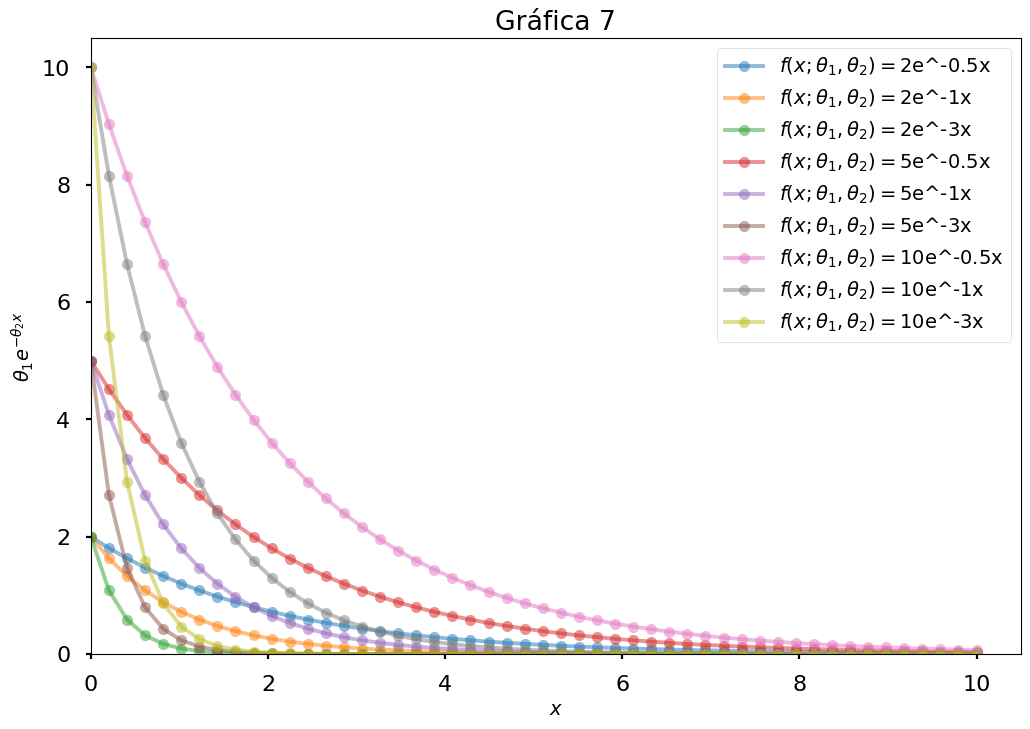

In [18]:
# Definimos el modelo paramétrico
def f_exp(x, theta_1, theta_2):
    return theta_1 * np.exp(-theta_2 * x)


# Creamos la figura
fig, ax = plt.subplots(figsize=(12, 8))

# Creamos el dominio
x = np.linspace(0, 10, 50)
# Creamos los valores de theta_1
theta_1 = [2, 5, 10]
theta_2 = [0.5, 1, 3]

for param_1 in theta_1:
    for param_2 in theta_2:
        ax.plot(
            x,
            f_exp(x, param_1, param_2),
            label="$f(x;\\theta_{1},\\theta_{2}) = $" + "{0}e^-{1}x".format(param_1, param_2),
            alpha=0.5,
            marker="o",
            markersize=8,
        )

ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$\\theta_{1} e^{-\\theta_2 x}$", fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)
plt.title("Gráfica 7")
plt.show()

* Con base en los datos de la gráfica 6 y el análisis de la gráfica 7
* Proponemos el siguiente modelo : $f(x;\theta) = 157e^{-\theta x}$

In [19]:
# Definimos el modelo: f(x) = init*e^(-theta_1*x)
def model_Billioners(x, theta):
    init = numbillionaires[0][0]
    return init * np.exp(-theta[0] * x[0])


# Inicializacion de el parámetro theta_1
theta = np.array([0.0])

In [20]:
# Entrenamiento del modelo con 200 caminadores
thetas, error = walkers(
    200,
    billions,
    numbillionaires,
    model_Billioners,
    theta,
    None,
    0.01,
    200,
    0.1,
    1.0 * 10**-3,
    False,
    None,
)
n = np.where(error == min(error))[0][0]

theta = np.array(thetas[n])

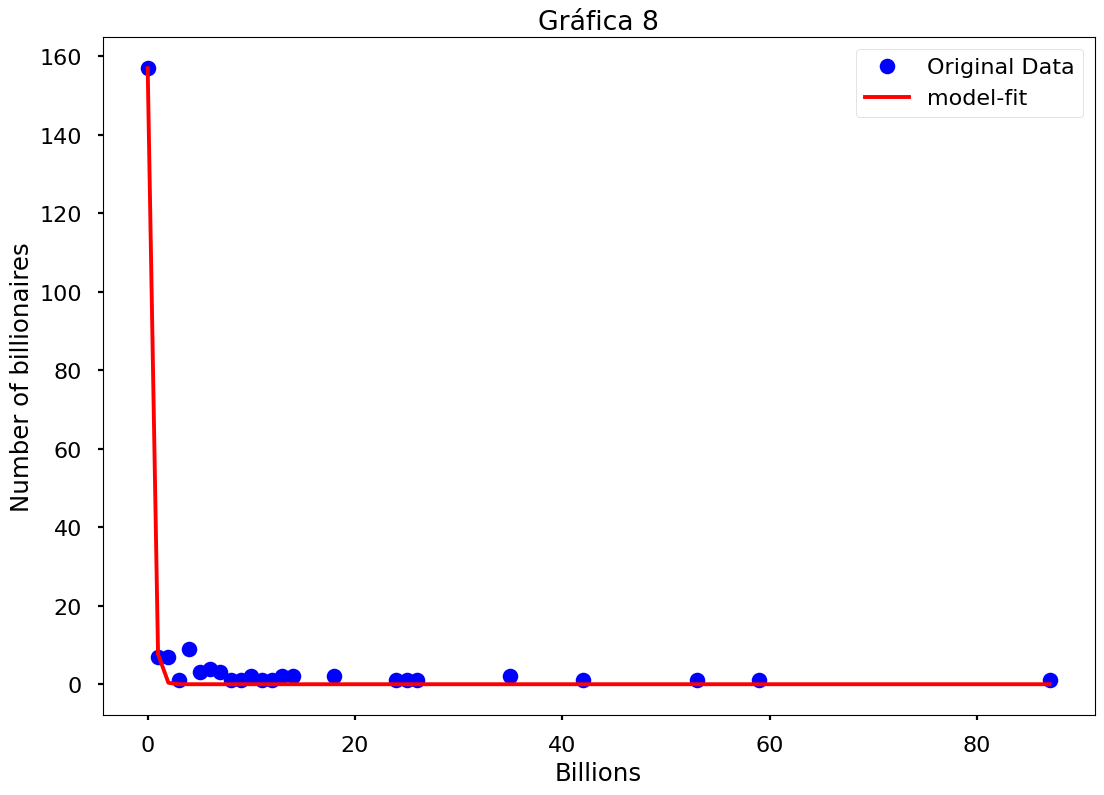

In [21]:
# Gráfica del modelo entrenado y un scatter de los puntos
plt.plot(billions[0], numbillionaires, "bo", label="Original Data")
plt.plot(billions[0], model_Billioners(billions, theta), "r-", label="model-fit")
plt.xlabel("Billions")
plt.ylabel("Number of billionaires")
plt.title("Gráfica 8")
plt.legend()
plt.show()

In [22]:
print("El valor de theta es: {0}".format(theta[0]))

El valor de theta es: 3.020498318141728


* Gráfica del modelo parámétrico entrenado con 200 caminadores:
   $f(x;3.0202) = 157e^{-3.0202 x}$

* Consideremos ahora que el modelo tiene dos parámetros. Entonces desamos encontrar: $f(x;\theta_{1},\theta_{2}) = \theta_{1} e^{-\theta_{2} x}$

In [23]:
# Definición del modelo f(x,theta_1,theta_2)
def model_Billioners2(x, theta):
    return theta[0] * np.exp(-theta[1] * x[0])


# Inicialización de el parámetro theta_1, theta_2
theta = np.array([0.0, 0.0])

In [24]:
# Entrenamiento del modelo con 200 caminadores
thetas, error = walkers(
    200,
    billions,
    numbillionaires,
    model_Billioners2,
    theta,
    None,
    0.01,
    200,
    0.1,
    1.0 * 10**-3,
    False,
    figname=None,
)
n = np.where(error == min(error))[0][0]

theta = np.array(thetas[n])

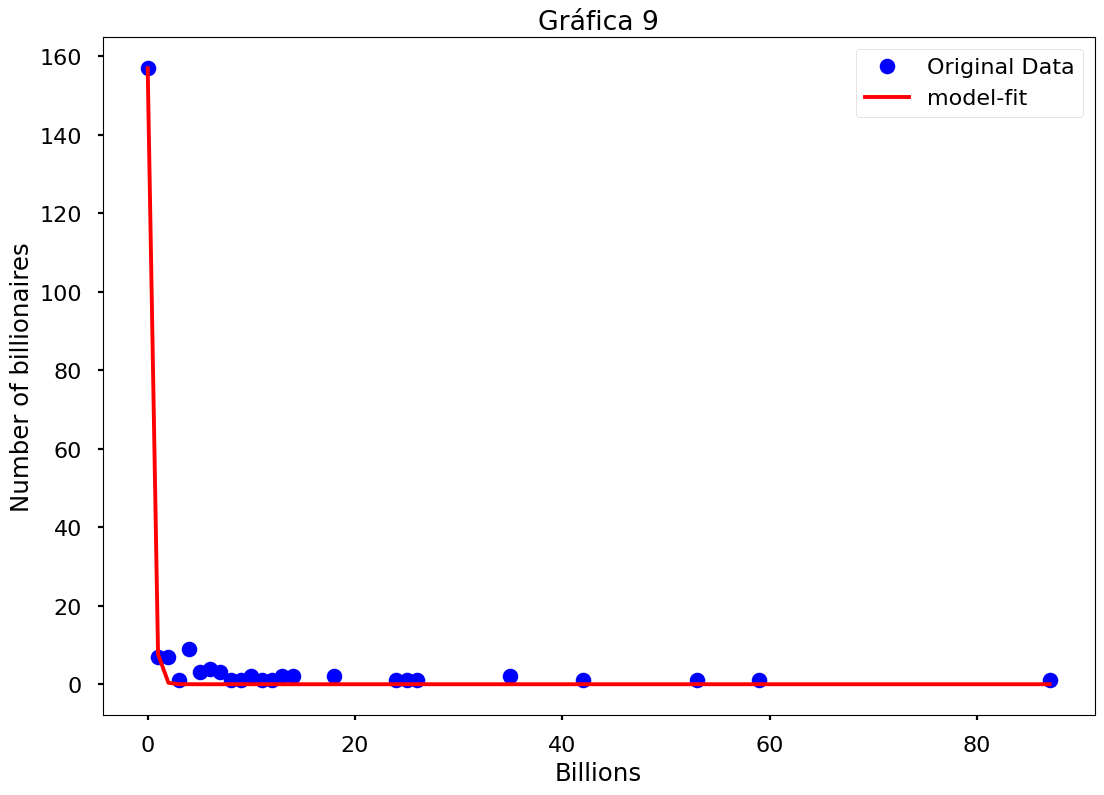

In [25]:
# Gráfica del modelo entrenado y un scatter de los puntos
plt.plot(billions[0], numbillionaires, "bo", label="Original Data")
plt.plot(billions[0], model_Billioners2(billions, theta), "r-", label="model-fit")
plt.xlabel("Billions")
plt.ylabel("Number of billionaires")
plt.title("Gráfica 9")
plt.legend()
plt.show()

In [26]:
print("El valor de theta_1 es: {0}, y el valor de theta_2 es: {1}".format(theta[0], theta[1]))

El valor de theta_1 es: 157.00546783088072, y el valor de theta_2 es: 3.022366661479154


* Consideremos ahora que el modelo tiene tres parámetros. Entonces desamos encontrar: $f(x;\theta_{1},\theta_{2}, \theta_{3}) = \theta_{1} e^{-\theta_{2} x} + \theta_{3}$

In [27]:
# Definición del modelo f(x,theta_1,theta_2)
def model_Billioners3(x, theta):
    return theta[0] * np.exp(-theta[1] * x[0]) + theta[2]


# Inicialización de el parámetro theta_1, theta_2
theta = np.array([0.0, 0.0, 0.0])

# Entrenamiento del modelo con 200 caminadores
thetas, error = walkers(
    200,
    billions,
    numbillionaires,
    model_Billioners3,
    theta,
    None,
    0.01,
    200,
    0.1,
    1.0 * 10**-3,
    False,
    figname=None,
)
n = np.where(error == min(error))[0][0]

theta = np.array(thetas[n])

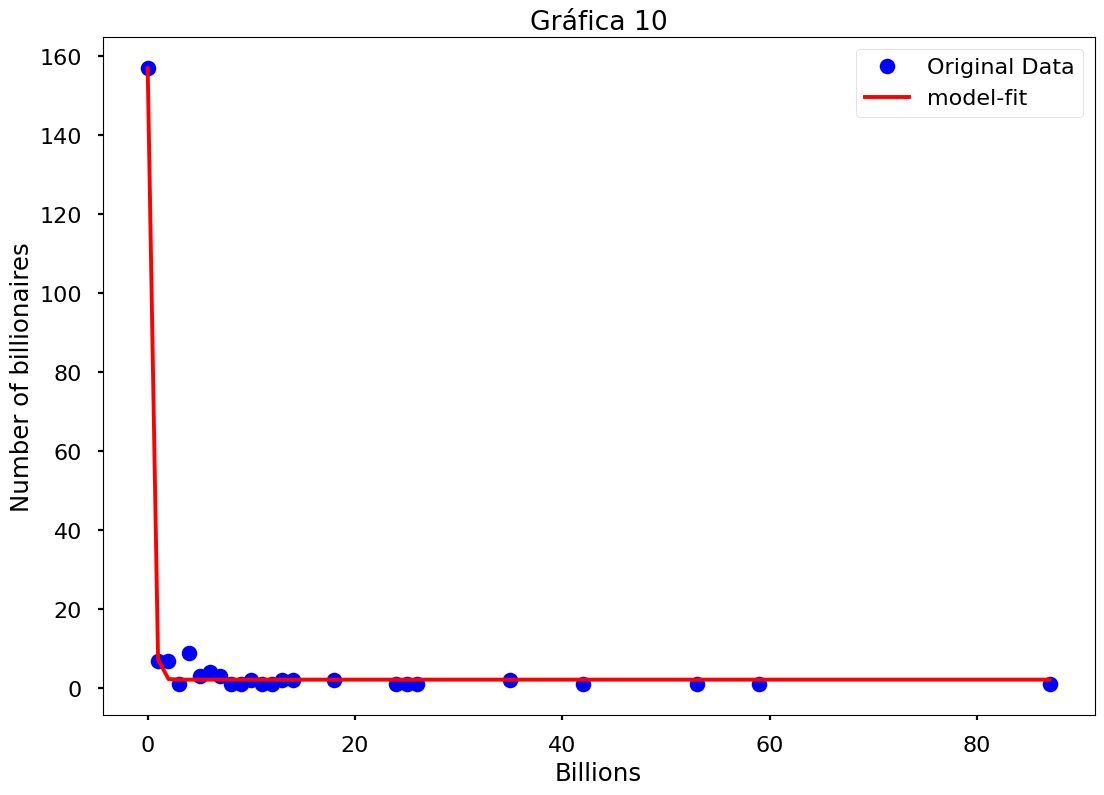

In [28]:
# Gráfica del modelo entrenado y un scatter de los puntos
plt.plot(billions[0], numbillionaires, "bo", label="Original Data")
plt.plot(billions[0], model_Billioners3(billions, theta), "r-", label="model-fit")
plt.xlabel("Billions")
plt.ylabel("Number of billionaires")
plt.title("Gráfica 10")
plt.legend()
plt.show()

In [29]:
print(
    "El valor de theta_1 es: {0}, el valor de theta_2 es: {1}, y el valor de theta_3 es {2}".format(
        theta[0], theta[1], theta[2]
    )
)

El valor de theta_1 es: 154.8423827754504, el valor de theta_2 es: 3.402882346420428, y el valor de theta_3 es 2.1662287278855987
